In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
df.drop('Address', axis=1, inplace = True)

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df.drop('Price', axis=1))
scaled_data = ss.transform(df.drop('Price', axis=1))

In [8]:
scaled_data.shape

(5000, 5)

In [9]:
X = pd.DataFrame(data = scaled_data, columns = df.columns[:-1])

In [10]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [11]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


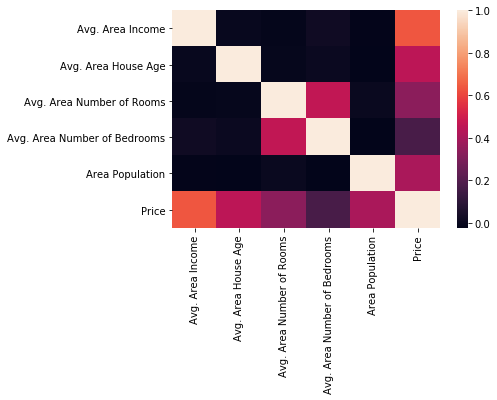

In [12]:
sns.heatmap(df.corr())

In [13]:
X.drop('Avg. Area Number of Bedrooms', axis=1, inplace=True)

In [14]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.028660,-0.296927,0.021274,-1.317599
1,1.000808,0.025902,-0.255506,0.403999
2,-0.684629,-0.112303,1.516243,0.072410
3,-0.491499,1.221572,-1.393077,-0.186734
4,-0.807073,-0.944834,0.846742,-0.988387


In [15]:
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, ytrain, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lm.coef_

array([229430.99730849, 164220.36828271, 120325.91574002, 150894.14336493])

In [22]:
ypred = lm.predict(X_test)

In [23]:
len(ypred)

1500

In [24]:
len(y_test)

1500

(array([  8.,  44., 130., 318., 351., 358., 178.,  93.,  15.,   5.]),
 array([-309860.36295931, -245216.60898002, -180572.85500073,
        -115929.10102143,  -51285.34704214,   13358.40693715,
          78002.16091644,  142645.91489574,  207289.66887503,
         271933.42285432,  336577.17683362]),
 <a list of 10 Patch objects>)

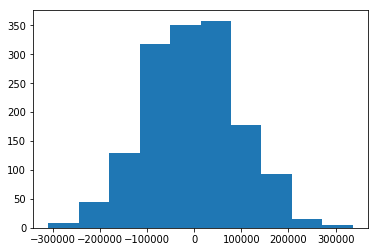

In [25]:
plt.hist(ypred - y_test)

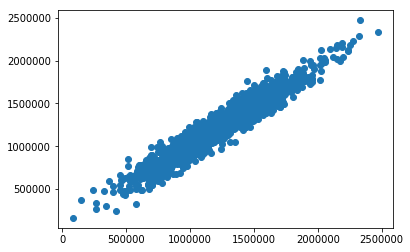

In [26]:
plt.scatter(y_test, ypred)